## Data Pre-processing for Kota Bharu dataset

I inspect the dataframe for:
1. missing values
2. convert data types
3. remove unnecessary column
4. identify unique value
5. remove characters
6. provide descriptive/summary statistics
7. visualize data
8. measure correlation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
water_level = pd.read_csv('JPS WL data-kbharu.csv')  
water_level.head(3)

,Date,Time,Stage m
0,1/1/2010,24:00:00,0.2
1,2/1/2010,24:00:00,0.2
2,3/1/2010,24:00:00,0.2


In [4]:
len(water_level)

3500

In [6]:
# remove Time column
water_level.drop(['Time'], axis=1, inplace=True)
water_level.head(3)

,Date,Stage m
0,1/1/2010,0.2
1,2/1/2010,0.2
2,3/1/2010,0.2


In [7]:
#check for data types
water_level.dtypes

Date       object
Stage m    object
dtype: object

In [8]:
# check for unique value
water_level['Stage m'].unique()

array(['0.2', '0.18', '0.21', '0.22', '0.17', '0.19', '0.14', '0.16',
       '0.15', '0.13', '0.12', '0.07', '0.02', '-0.03', '-0.08', '-0.1',
       '-0.2', '-0.18', '-0.24', '0.33', '0.68', '0.54', '0.59', '0.55',
       '0.42', '0.45', '0.47', '0.48', '0.39', '0.43', '0.36', '0.4',
       '0.34', '0.38', '0.63', '0.62', '0.65', '0.6', '0.64', '0.41',
       '0.31', '0.37', '0.35', '0.5', '0.61', '0.7', '0.58', '0.29',
       '0.66', '0.52', '0.44', '0.46', '0.49', '0.51', '0.03', '0.73',
       '0.32', '0.81', '-0.11', '0.25', '0.08', '0.04', '0.06', '0.05',
       '-0.12', '-0.15', '-0.13', '-0.09', '-0.01', '-0.23', '-0.21',
       '-0.14', '0.57', '-0.07', '0.26', '0.3', '0.24', '0', '0.72',
       '0.28', '-0.05', '0.56', '0.11', '0.27', '0.77', '0.83', '0.71',
       '0.69', '0.53', '0.8', '0.89', '0.97', '0.99', '0.82', '0.75',
       '0.78', '0.93', '0.98', '0.85', '1.13', '1.07', '1.09', '1.14',
       '1.01', '1.02', '1.75', '1.87', '1.21', '1.11', '1.17', '1.16',
       '0

In [9]:
# remove special characters
water_level['Stage m'] = water_level['Stage m'].str.replace('#','').astype(float)

In [10]:
#convert data types for Stage variable
water_level['Stage m'] = pd.to_numeric(water_level['Stage m'])
water_level.dtypes

Date        object
Stage m    float64
dtype: object

In [11]:
# check for missing values
water_level.isna().sum()

Date       1
Stage m    1
dtype: int64

In [13]:
# remove last row
water_level.drop(water_level.tail(1).index, inplace=True)
water_level

,Date,Stage m
0,1/1/2010,0.20
1,2/1/2010,0.20
2,3/1/2010,0.20
3,4/1/2010,0.18
4,5/1/2010,0.21
...,...,...
3494,27/07/2019,0.21
3495,28/07/2019,0.20
3496,29/07/2019,0.11
3497,30/07/2019,0.13


In [14]:
# check missing values again
water_level.isnull().sum()

Date       0
Stage m    0
dtype: int64

In [15]:
# convert to datetime
from datetime import datetime
water_level['Date'] = pd.to_datetime(water_level['Date'])

In [16]:
# set date as index
water_level.set_index('Date', inplace=True)
water_level

,Stage m
Date,
2010-01-01,0.20
2010-02-01,0.20
2010-03-01,0.20
2010-04-01,0.18
2010-05-01,0.21
...,...
2019-07-27,0.21
2019-07-28,0.20
2019-07-29,0.11


In [17]:
water_level.describe()

,Stage m
count,3499.000000
mean,0.689937
std,0.593307
min,-0.240000
25%,0.380000
50%,0.610000
75%,0.840000
max,6.930000


In [18]:
water_level.median()

Stage m    0.61
dtype: float64

In [19]:
#saving cleaned data
water_level.to_csv('cleaned-JPS WL data-kbharu.csv')

## Data visualization

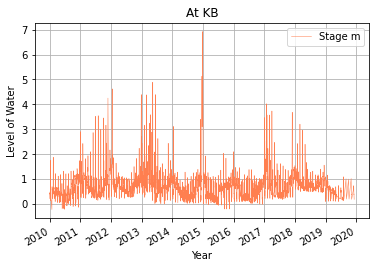

In [20]:
#plot the time series of water level 
plt.style.use('seaborn-deep')
ax = water_level.plot(color='coral', grid=True, linewidth=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Level of Water')
ax.set_title('At KB')
plt.show()

<AxesSubplot:ylabel='Frequency'>

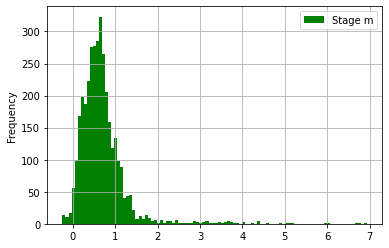

In [21]:
#plot the histogram
water_level.plot(kind='hist', bins=100, color='green', grid=True)

<AxesSubplot:ylabel='Density'>

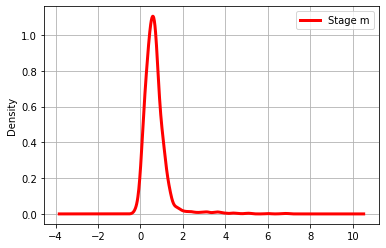

In [22]:
# kernel density plot
water_level.plot(kind='density', color="red", grid=True, linewidth=3, fontsize=10)

<Figure size 432x216 with 0 Axes>

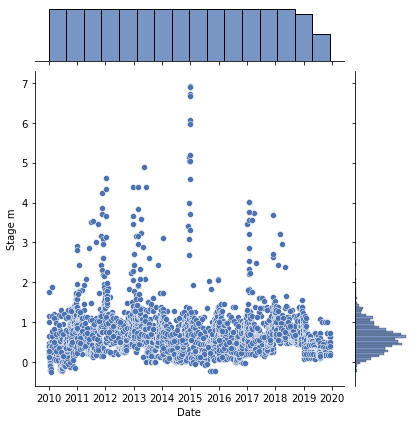

In [23]:
#scatter plot with marginal histograms
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.jointplot(
    x="Date", y="Stage m",
    edgecolor="white",
    data=water_level
)
plt.xlabel("Date")
plt.ylabel("Stage m");

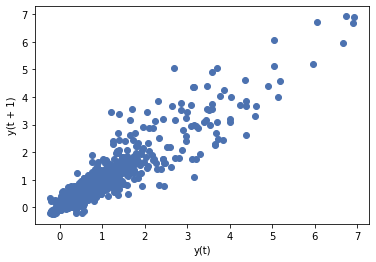

In [24]:
# lag plot
from pandas.plotting import lag_plot

lag_plot(water_level)
plt.show()

The plot above shows the water level data on the y(t) against its previous time step, prior month, the the y(t+1). It is assume that the relationship is positive.


In [25]:
# Autocorrelation
autocorrelation = water_level['Stage m'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.93


The correlation between the water level data and its lag variable by a time step shows a high correlation at 0.93. This indicates that there is a substantial, positive relationship.

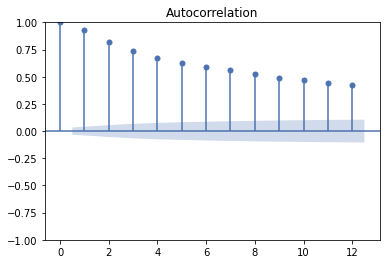

In [26]:
# Plot ACF to visualize the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(water_level['Stage m'], lags=12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values.

Value of partial autocorrelation that are close to 0 indicates that there is no correlation between observations values and lagged values. On the other hand, value close to 1 or -1 shows that correlations are in strong positive or negative between the lagged observations of the time series.